In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = 'C:\Program Files\ImageMagick-7.1.0-Q16-HDRI'
%matplotlib inline
#%matplotlib notebook
#%matplotlib notebook
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = 'C:/Users/gbgb1/anaconda3/Library/share/proj'
from mpl_toolkits.basemap import Basemap

try:
    eqDataDF = pd.read_csv('database.csv')
except:
    print("Date load failed...")

eqDataDF.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [31]:
eqDataDF['Year']= eqDataDF['Date'].str[6:]

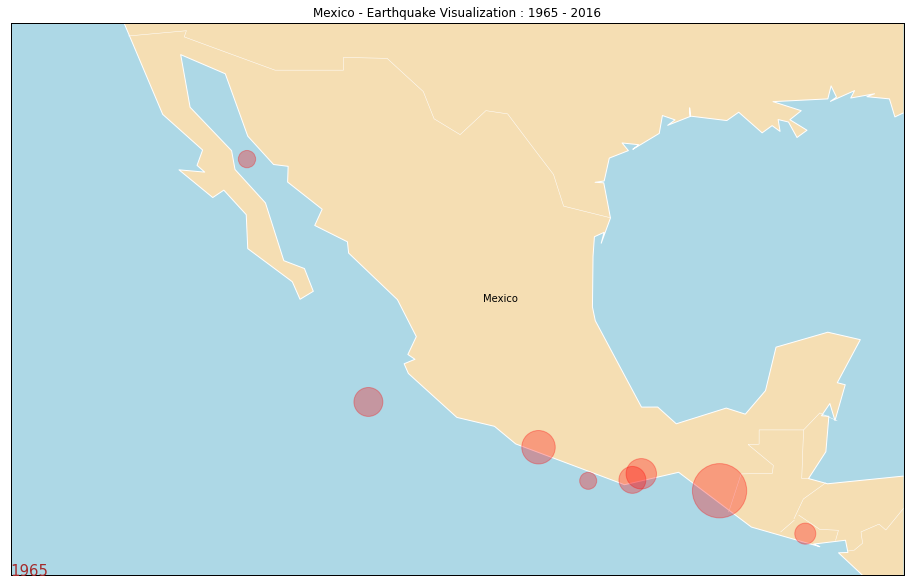

In [41]:
fig = plt.figure(figsize=(16, 16))
fig.text(.55, .50, 'Mexico', ha='center')
cmap = plt.get_cmap('tab20')

ax = Basemap(projection='merc',urcrnrlat=33,urcrnrlon=-85,llcrnrlat=12, llcrnrlon=-122,lat_ts=20,resolution='c')
ax.drawcoastlines(color='white')
ax.drawcountries(color='white')
ax.fillcontinents(color='wheat',lake_color='aqua', zorder = 1)
ax.drawmapboundary(fill_color='lightblue')


sYear = 1965
lYear = 2016

points = eqDataDF[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']][eqDataDF['Year']==str(sYear)]

x, y= ax(list(points['Longitude']), list(points['Latitude']))
scat = ax.scatter(x, y, s = points['Magnitude']*points['Depth']*5, marker='o', alpha=0.3, zorder=10, color= 'red',cmap = cmap)
yearText = plt.text(-170, 80, str(sYear),fontsize=15, color='brown')
plt.title("Mexico - Earthquake Visualization : 1965 - 2016")
#plt.close()


def entirePeriod(frame_number):
    cYear = sYear + (frame_number % (lYear - sYear + 1))
    yearText.set_text(str(cYear))
    points = eqDataDF[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']][eqDataDF['Year']==str(cYear)]
    x, y= ax(list(points['Longitude']), list(points['Latitude']))
    color = points['Depth']*points['Magnitude'];
    #scat.set_offsets(np.dstack((x, y)))
    scat.set_offsets(np.stack((x, y), axis=1))
    scat.set_sizes(points['Magnitude']*points['Depth']*5)
    

animation.FuncAnimation(fig, entirePeriod, interval=750, frames=lYear - sYear + 1)
plt.show()
anim = animation.FuncAnimation(fig, entirePeriod, interval=750, frames=lYear - sYear + 1)
anim.save('animationMexico.gif', writer='imagemagick', fps=2)
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)



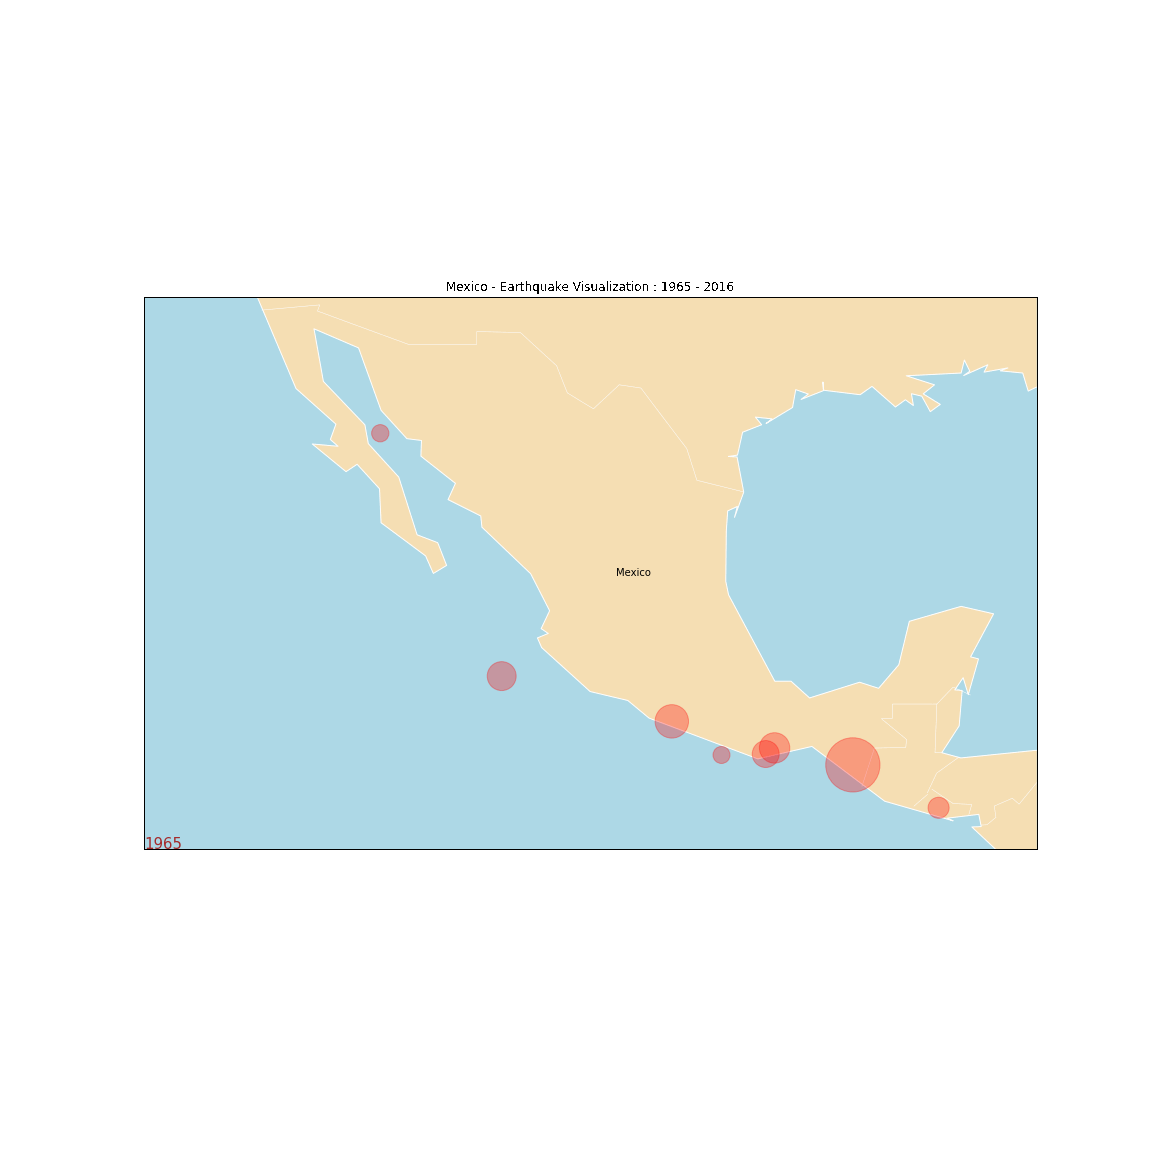

In [42]:
import io
import base64

file = 'animationMexico.gif'

movie = io.open(file, 'r+b').read()
encoded = base64.b64encode(movie)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))